In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
full_df = pd.read_csv('cleaned_dataset.csv')

full_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,1,67,11.72,seul,Postbac,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,70,10.22,seul,Postbac,2,1
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,59,10.76,couple,Postbac,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,40,10.29,couple,Postbac,1,1
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,43,10.35,couple,Postbac,1,1


In [3]:
full_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'CustomerAge', 'Seniority',
       'Relationship_Status', 'Simplified_Education', 'TotalChildren',
       'HasChild'],
      dtype='object')

In [4]:
column_filter = ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 
                 'Gold', 'Seniority']

df = full_df[column_filter].copy()
df.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Seniority
0,58138,58,635,88,546,172,88,88,11.72
1,46344,38,11,1,6,2,1,6,10.22
2,71613,26,426,49,127,111,21,42,10.76
3,26646,26,11,4,20,10,3,5,10.29
4,58293,94,173,43,118,46,27,15,10.35


In [5]:
X = df.copy()

In [6]:
X.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Seniority
0,58138,58,635,88,546,172,88,88,11.72
1,46344,38,11,1,6,2,1,6,10.22
2,71613,26,426,49,127,111,21,42,10.76
3,26646,26,11,4,20,10,3,5,10.29
4,58293,94,173,43,118,46,27,15,10.35


In [7]:
X.dtypes

Income         int64
Recency        int64
Wines          int64
Fruits         int64
Meat           int64
Fish           int64
Sweets         int64
Gold           int64
Seniority    float64
dtype: object

In [8]:
X.corr()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Seniority
Income,1.000000,0.002992,0.679342,0.502208,0.687228,0.515354,0.518418,0.375072,-0.016592
Recency,0.002992,1.000000,0.011474,-0.013072,0.013150,-0.002470,0.022353,0.010985,0.030912
Wines,0.679342,0.011474,1.000000,0.384230,0.561126,0.394122,0.383063,0.391575,0.173465
Fruits,0.502208,-0.013072,0.384230,1.000000,0.545114,0.590013,0.559897,0.396304,0.079785
Meat,0.687228,0.013150,0.561126,0.545114,1.000000,0.568366,0.528398,0.350980,0.094965
Fish,0.515354,-0.002470,0.394122,0.590013,0.568366,1.000000,0.586045,0.418646,0.090948
Sweets,0.518418,0.022353,0.383063,0.559897,0.528398,0.586045,1.000000,0.362329,0.092042
Gold,0.375072,0.010985,0.391575,0.396304,0.350980,0.418646,0.362329,1.000000,0.175720
Seniority,-0.016592,0.030912,0.173465,0.079785,0.094965,0.090948,0.092042,0.175720,1.000000


In [9]:
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Seniority
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.947644
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.162304
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.445026
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.198953
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.230366


In [10]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores   = {}
inertias = {}

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=50)  # , algorithm='full')
    kmeans.fit(X_scaled)
    scores[i] = silhouette_score(X_scaled, kmeans.labels_)
    inertias[i] = kmeans.inertia_

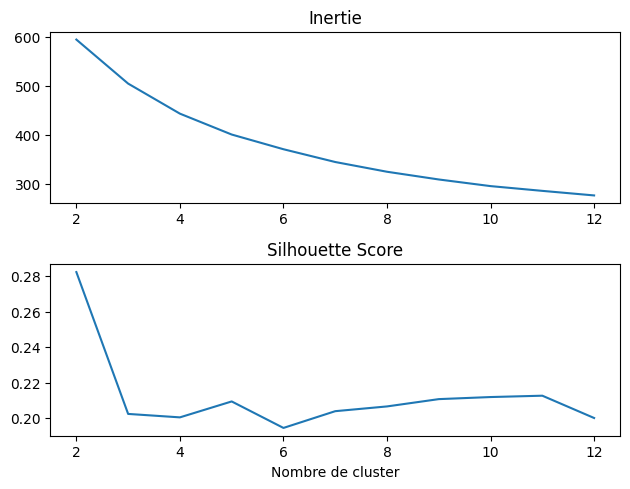

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(list(inertias.keys()), list(inertias.values()))
ax1.set_title('Inertie')

ax2.plot(list(scores.keys()), list(scores.values()))
ax2.set_title('Silhouette Score')

fig.tight_layout()

plt.xlabel('Nombre de cluster')

plt.show()

/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.42535729026135005


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.09105821093488586


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.0414284364699298


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : -0.09871678531761352


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : -0.1356123560337334


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : -0.13449284171448816


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : -0.13050051538459775


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : -0.1566388508998401


/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.13993985423826713


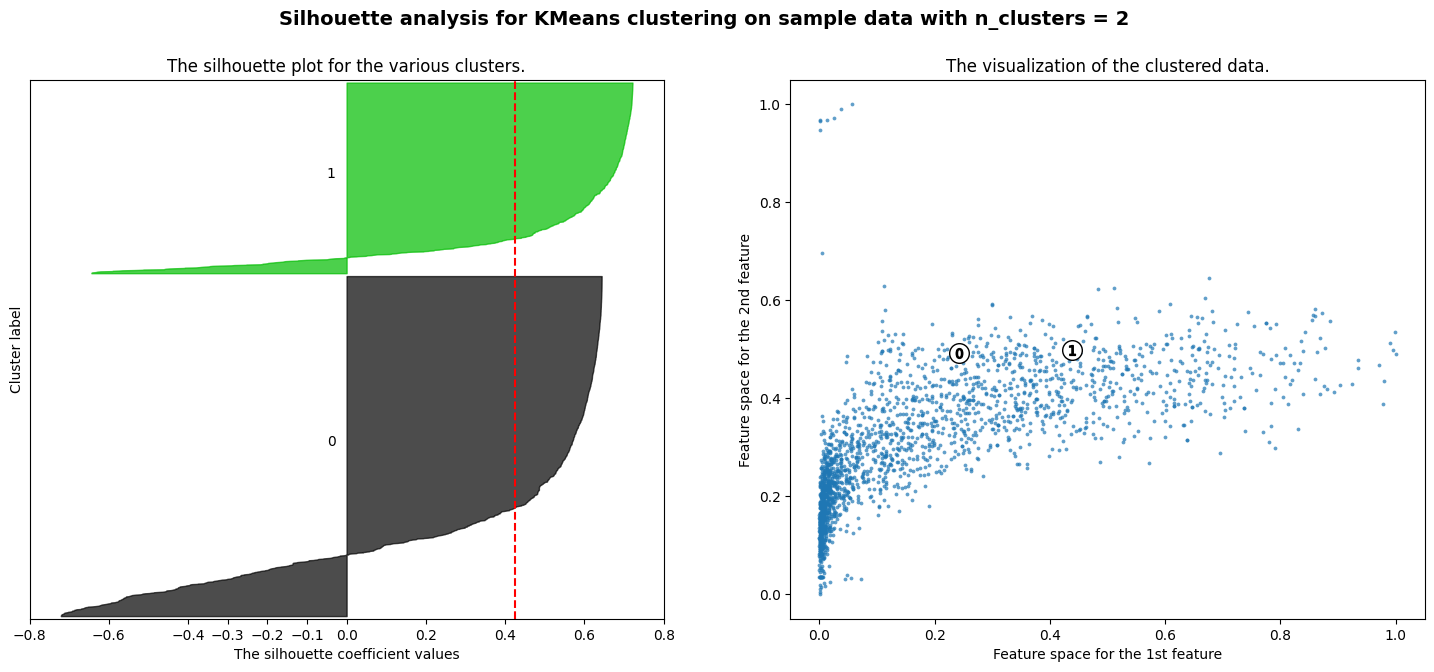

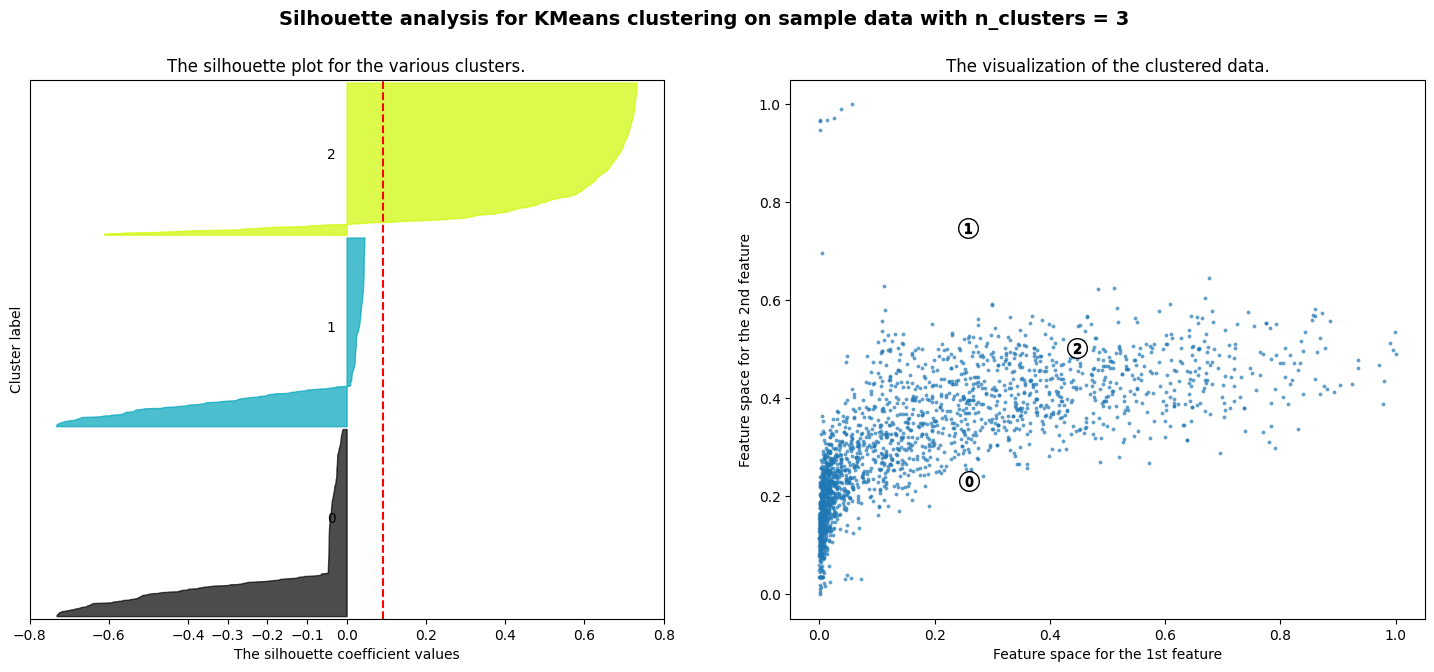

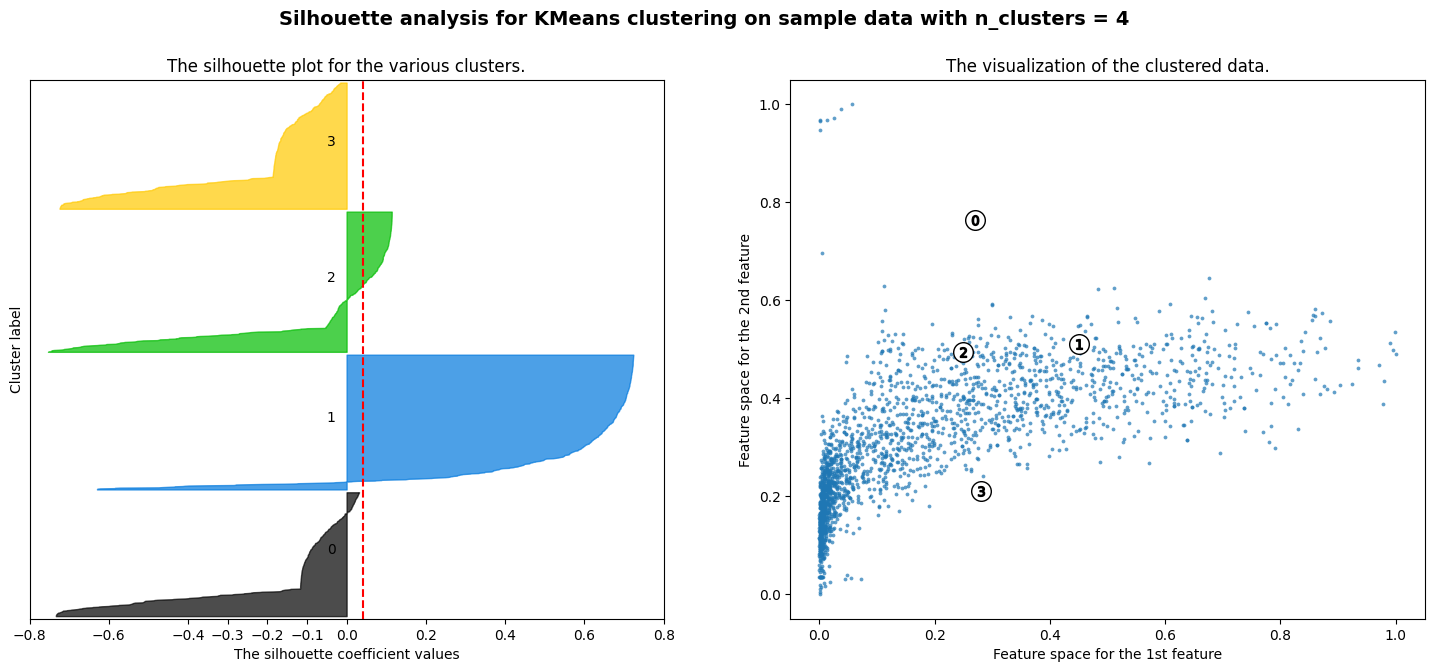

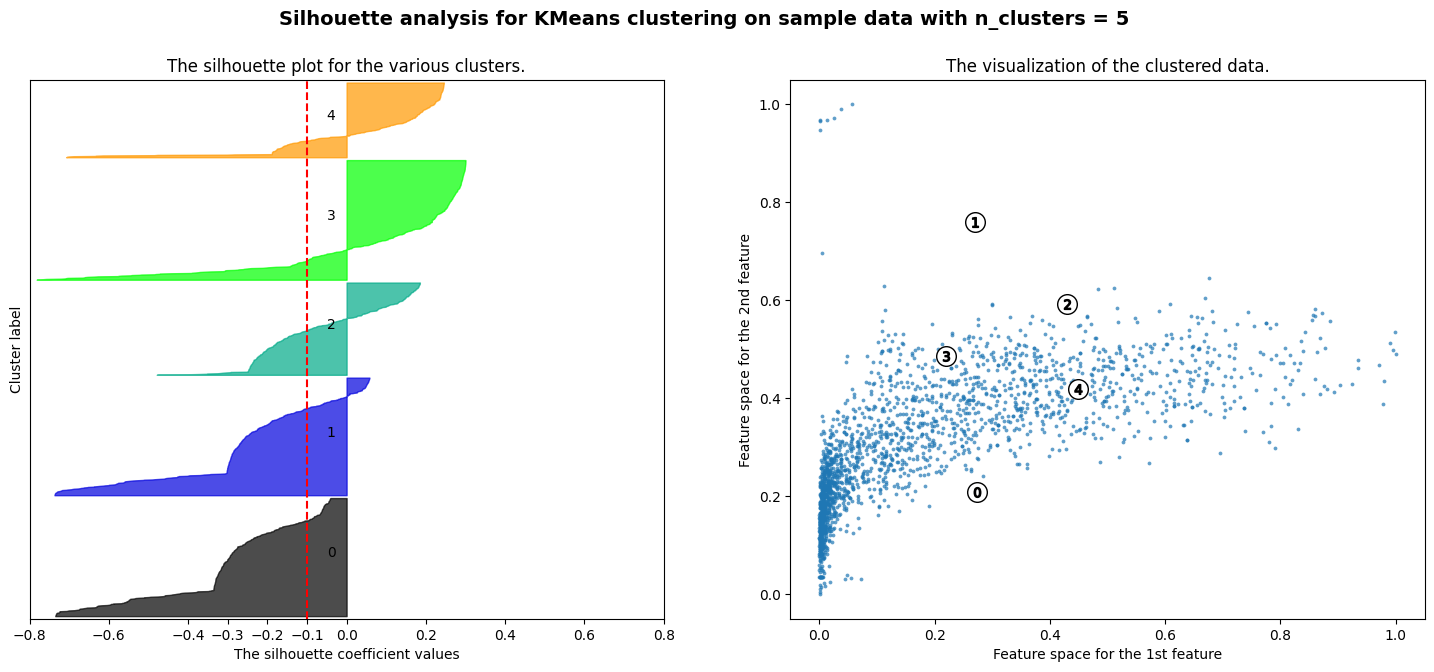

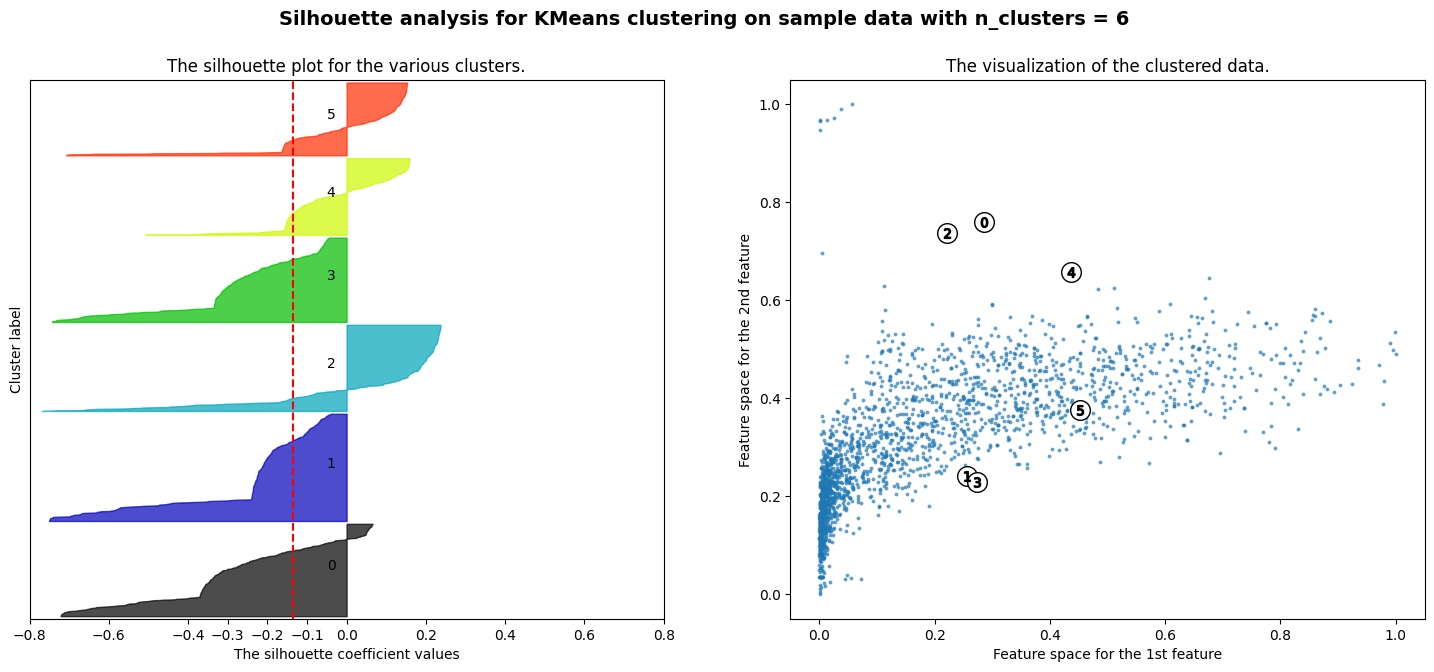

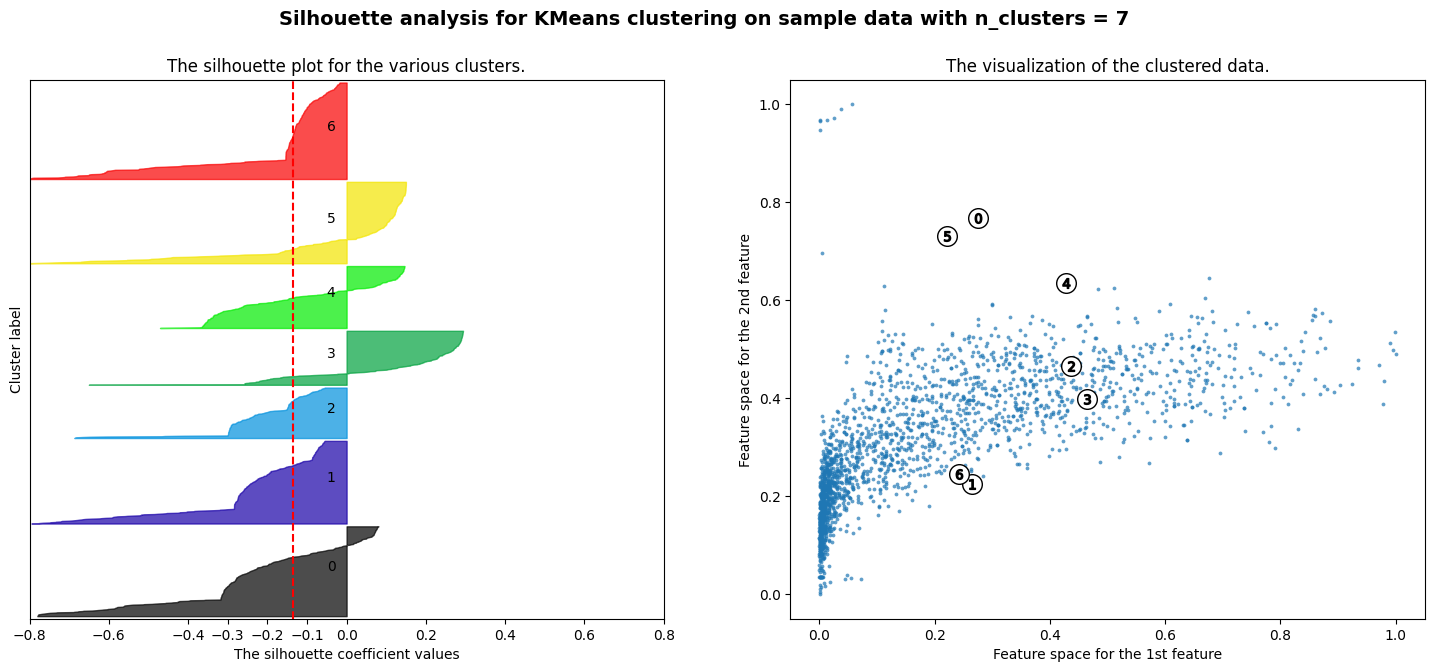

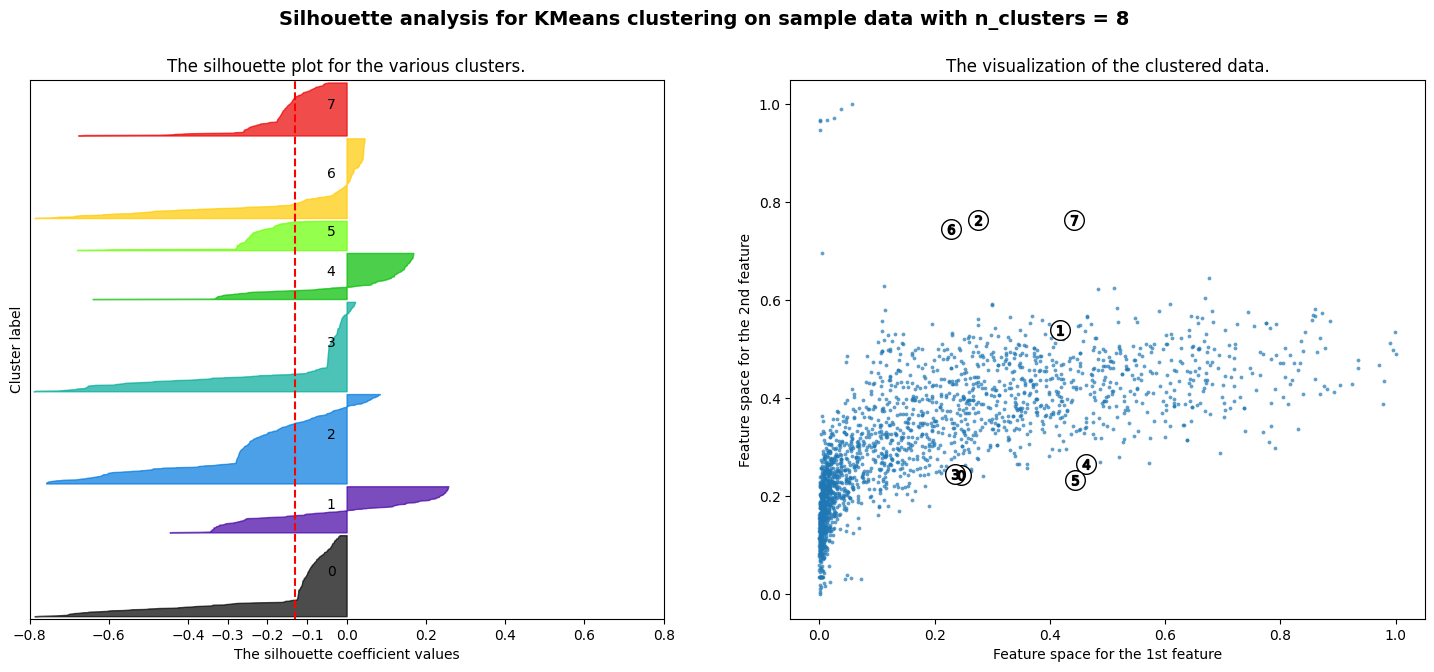

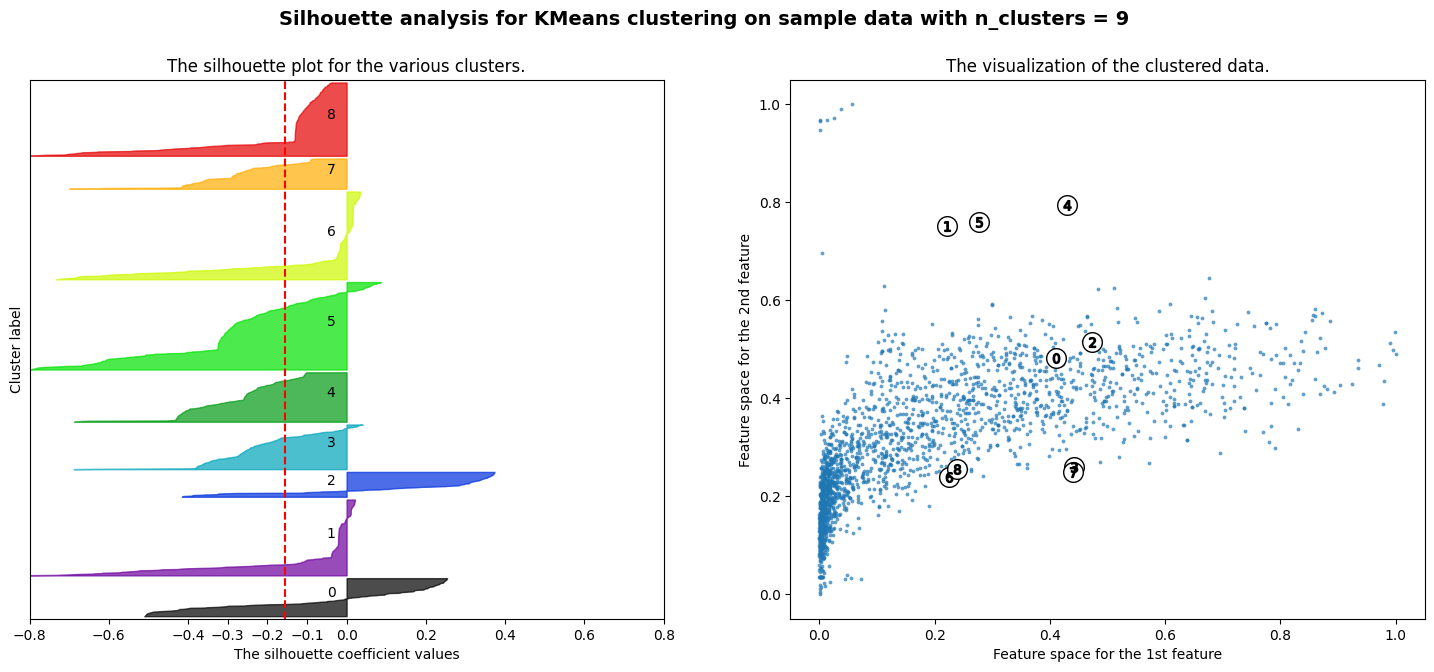

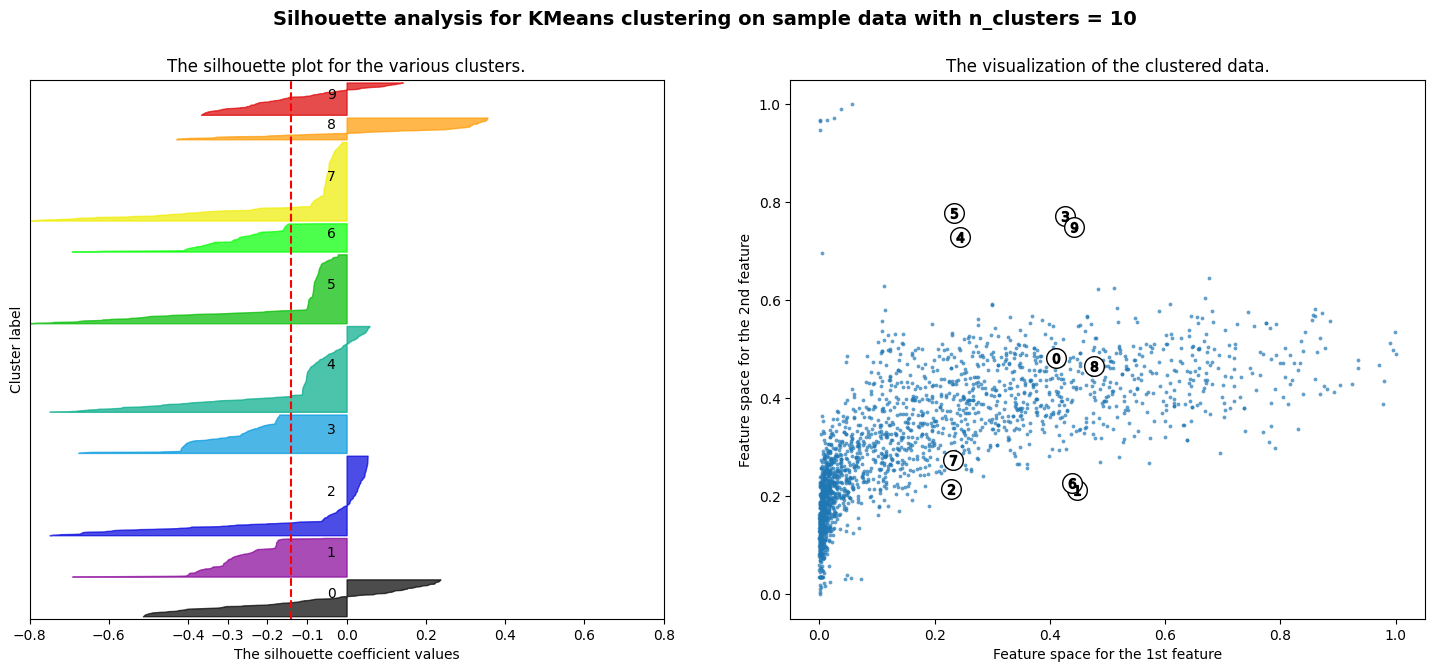

In [22]:
cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.8, 0.8])
    
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Cluster
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled['Wines'], X_scaled['Income'], marker=".", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

In [13]:
kmeans = KMeans(n_clusters=3, n_init=100, algorithm='full', random_state=10)
kmeans.fit(X_scaled)

/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', n_clusters=3, n_init=100, random_state=10)

In [14]:
# Create copies of the dataframes
X_labeled = X.copy()
X_scaled_labeled = X_scaled.copy()

# Add the labels to the dataframes
X_labeled['labels'] = kmeans.labels_
X_scaled_labeled['labels'] = kmeans.labels_

OptionError: No such keys(s): 'mode.use_inf_as_null'

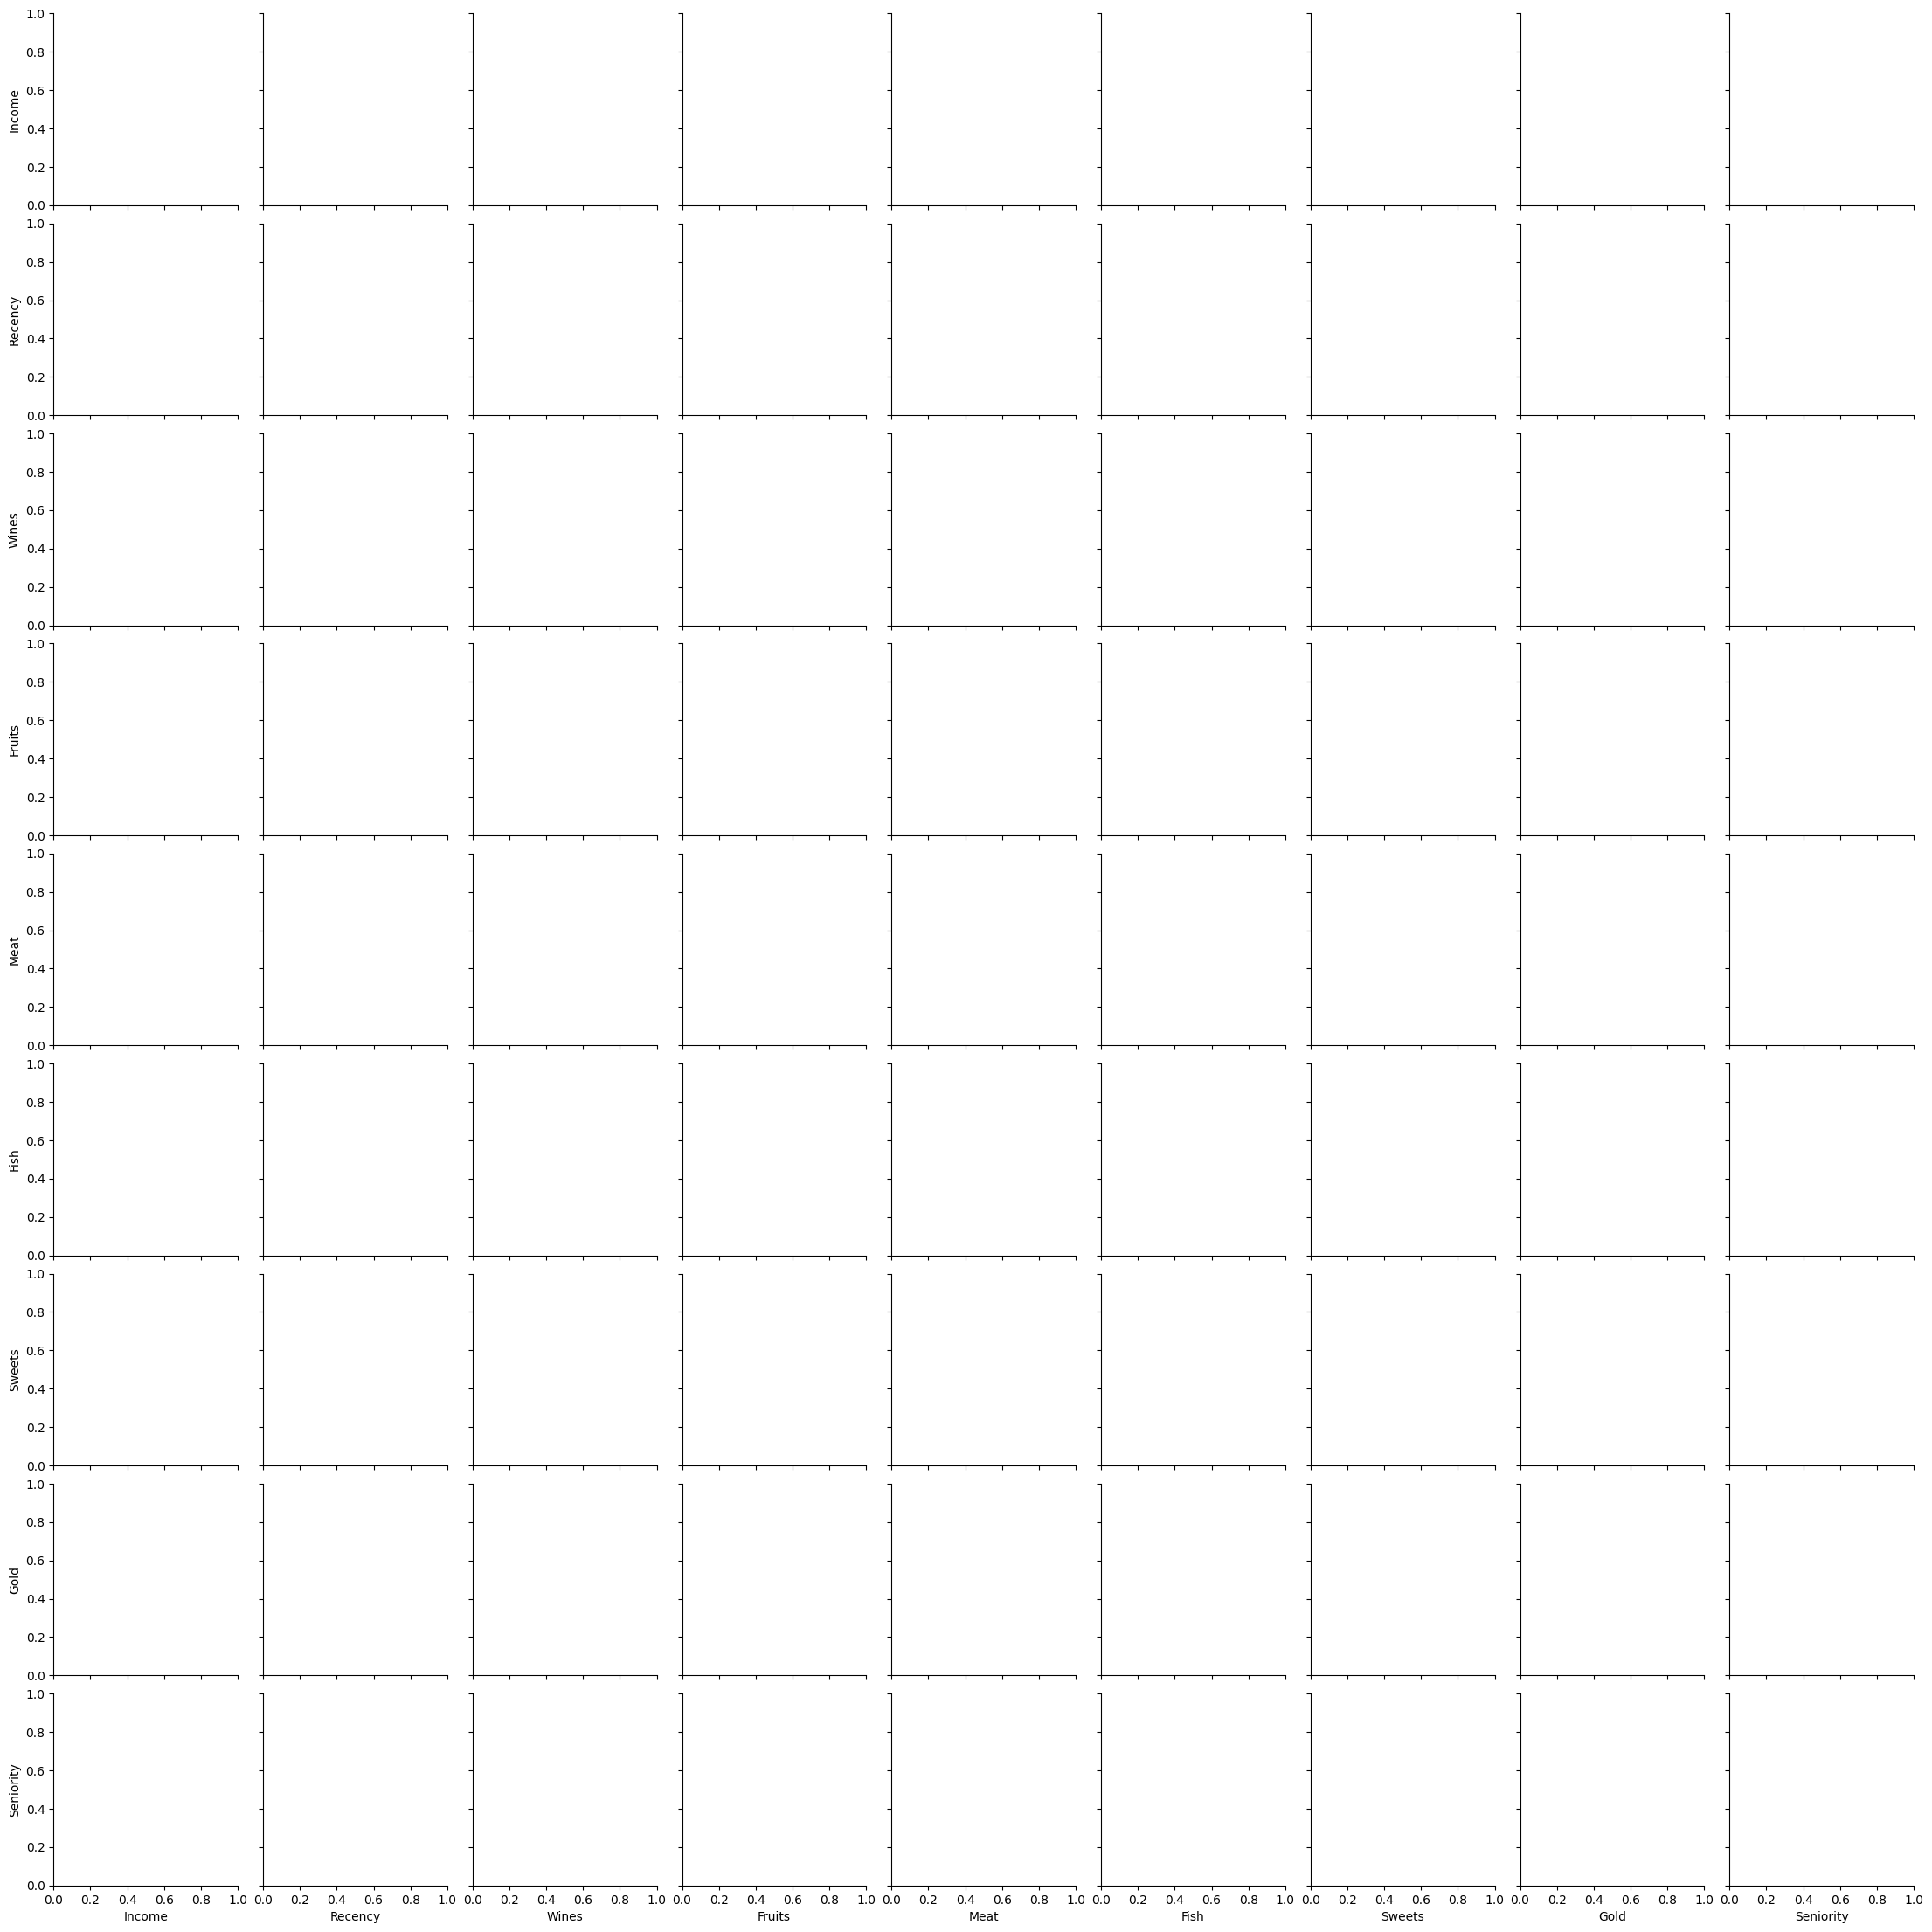

In [21]:
sns.pairplot(X_scaled_labeled, hue='labels')
plt.show()